# Robost Scaling
1. It is used to scale the value but it is reduce the `outliers`

# Import packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load Dataset

In [33]:
df=pd.read_csv('insurance_data.csv',usecols=['age','bmi','bloodpressure','claim'])
df.head(2)

,age,bmi,bloodpressure,claim
0,39.0,23.2,91,1121.87
1,24.0,30.1,87,1131.51


In [34]:
df.isnull().sum()

age              5
bmi              0
bloodpressure    0
claim            0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.head()

,age,bmi,bloodpressure,claim
0,39.0,23.2,91,1121.87
1,24.0,30.1,87,1131.51
7,19.0,41.1,100,1146.80
8,20.0,43.0,86,1149.40
9,30.0,53.1,97,1163.46


<Axes: >

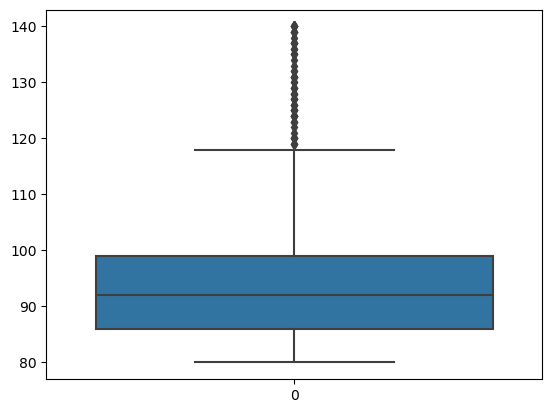

In [37]:
sns.boxplot(df['bloodpressure'])

# Conclussion
1. we can see the `blood pressure` contain outliers now apply the `Robost Scaling`

# Train tests Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['claim']),df['claim'],test_size=0.3,random_state=43)

# Fit the model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
pre=model.predict(x_test)

# r_2 Score

In [43]:
from sklearn.metrics import r2_score

In [44]:
score=r2_score(y_test,pre)
score

0.3526577171138007

# apply the `Robost Scaling`

In [45]:
from sklearn.preprocessing import RobustScaler

In [46]:
scale=RobustScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

# Fit the model again

In [47]:
model=LinearRegression()
model.fit(x_train_scale,y_train)

LinearRegression()

In [48]:
pre=model.predict(x_test_scale)

In [49]:
score2=r2_score(y_test,pre)
score2

0.3526577171138007

# Diference b/w `score` and `score2`

In [50]:
print(score-score2)

0.0


In [ ]:
# Conclusion
1. In this case it can't improve the result but some cases it can impro

In [13]:
scale_df=pd.DataFrame(x_train_scale,columns=x_train.columns)
scale_df

,age,bmi,bloodpressure
0,-0.352941,1.084548,-0.923077
1,-1.000000,1.422741,0.923077
2,-0.058824,0.163265,0.538462
3,-0.411765,-0.746356,-0.076923
4,0.705882,1.037901,0.769231
...,...,...,...
929,-0.941176,0.956268,-0.384615
930,-0.176471,0.104956,0.307692
931,1.352941,-1.119534,-0.153846
932,0.647059,0.361516,0.615385
